# Data Storytelling

#### Questions Asked:
1. What metadata factors influence patent prosecution time?
2. Is there a way to predict prosecution time based purely on bibliographic data?

#### Trends Investigated:
1. Correlation between number of claims and prosecution period.
2. Correlation between number of figures and prosecution period.
3. Correlation between "figure density" (i.e., number of figures per sheet) and prosecution period.


### Imports and Minor Data Munging

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read-in intermediate CSV

In [2]:
all_patents_df = pd.read_csv('../intermediate_csv_files/clean_raw_data.csv', parse_dates=['filing_date','grant_date'])

all_patents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352567 entries, 0 to 352566
Data columns (total 10 columns):
Unnamed: 0                  352567 non-null int64
application_number          352567 non-null int64
application_type            352567 non-null object
filing_date                 352567 non-null datetime64[ns]
grant_date                  352567 non-null datetime64[ns]
invention_title             352567 non-null object
number-of-drawing-sheets    352567 non-null int64
number-of-figures           352567 non-null int64
number_of_claims            352567 non-null int64
patent_number               352567 non-null object
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 26.9+ MB


### Type Casting

In [3]:
all_patents_df[['number-of-drawing-sheets','number-of-figures','number_of_claims']] = all_patents_df[['number-of-drawing-sheets','number-of-figures','number_of_claims']].astype(int) 

all_patents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352567 entries, 0 to 352566
Data columns (total 11 columns):
Unnamed: 0                  352567 non-null int64
application_number          352567 non-null int64
application_type            352567 non-null object
filing_date                 352567 non-null datetime64[ns]
grant_date                  352567 non-null datetime64[ns]
invention_title             352567 non-null object
number-of-drawing-sheets    352567 non-null int64
number-of-figures           352567 non-null int64
number_of_claims            352567 non-null int64
patent_number               352567 non-null object
number-of-drawing_sheets    352567 non-null int64
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 29.6+ MB


### Example Summary Stats (number of claims)

In [4]:
all_patents_df.number_of_claims.describe()

count    352567.000000
mean         14.817195
std           9.122482
min           1.000000
25%           9.000000
50%          16.000000
75%          20.000000
max         381.000000
Name: number_of_claims, dtype: float64

### Selecting Utility Patents

For the purpose of the deep dive analysis, this project will focus on utility patent types and exclude plant patents, design patents, and reissue patents.  From a domain experience perspective, utility patents have more variation in the number of claims and subject matter covered.  Plant patents and design patents are very different from utility patents but the legal distinction is beyond the scope of this project.  

In [5]:
utility_patents_df = all_patents_df[all_patents_df.application_type == 'utility']

utility_patents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319983 entries, 649 to 352566
Data columns (total 11 columns):
Unnamed: 0                  319983 non-null int64
application_number          319983 non-null int64
application_type            319983 non-null object
filing_date                 319983 non-null datetime64[ns]
grant_date                  319983 non-null datetime64[ns]
invention_title             319983 non-null object
number-of-drawing-sheets    319983 non-null int64
number-of-figures           319983 non-null int64
number_of_claims            319983 non-null int64
patent_number               319983 non-null object
number-of-drawing_sheets    319983 non-null int64
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 29.3+ MB


In [6]:
utility_patents_df.number_of_claims.describe()

count    319983.000000
mean         16.199423
std           8.377739
min           1.000000
25%          11.000000
50%          17.000000
75%          20.000000
max         381.000000
Name: number_of_claims, dtype: float64

## Dealing with Number of Claims Outliers

From the summary statistics on number of claims across the entire set, we see that the median number of claims is 17, while the maximum is 381.  This indicates that the distribution will be skewed to the right.  When reviewing the data, this observation can be seen by looking at the `.value_counts()` for each distinct value in the `number_of_claims` column. From industry experience, one would understand that most utility patent applications have less than 50 claims.  So, in order to create a better distribution, we will narrow down this data set by removing those patents with a number of claims that is greater than 3 standard deviations from the median value.

In [7]:
claims_std_dev = utility_patents_df.number_of_claims.std()
claims_median = utility_patents_df.number_of_claims.median()

utility_patents_subset_df = utility_patents_df[utility_patents_df.number_of_claims <= (claims_median + 3*claims_std_dev)].copy()

In [8]:
utility_patents_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316685 entries, 649 to 352566
Data columns (total 11 columns):
Unnamed: 0                  316685 non-null int64
application_number          316685 non-null int64
application_type            316685 non-null object
filing_date                 316685 non-null datetime64[ns]
grant_date                  316685 non-null datetime64[ns]
invention_title             316685 non-null object
number-of-drawing-sheets    316685 non-null int64
number-of-figures           316685 non-null int64
number_of_claims            316685 non-null int64
patent_number               316685 non-null object
number-of-drawing_sheets    316685 non-null int64
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 29.0+ MB


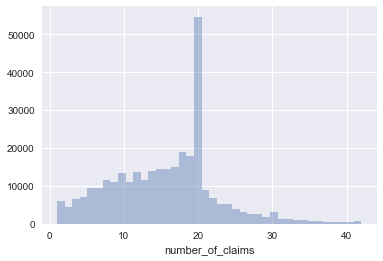

In [9]:
sns.set(color_codes=True)

sns.distplot(utility_patents_subset_df.number_of_claims, bins=40, kde=False)

plt.show()

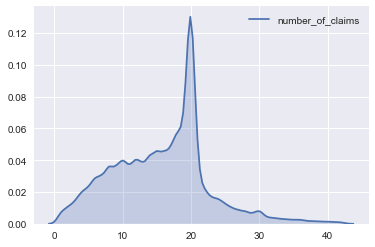

In [10]:
sns.kdeplot(utility_patents_subset_df.number_of_claims, shade=True)

plt.show()

# Calculating Prosecution Period

The time period during which a patent application is being "prosecuted" begins with the filing date and ends with the grant date.

In [11]:
# create new column 'prosecution_period' as difference between grant date and filing date

utility_patents_subset_df['prosecution_period'] = utility_patents_subset_df.grant_date - utility_patents_subset_df.filing_date

utility_patents_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316685 entries, 649 to 352566
Data columns (total 12 columns):
Unnamed: 0                  316685 non-null int64
application_number          316685 non-null int64
application_type            316685 non-null object
filing_date                 316685 non-null datetime64[ns]
grant_date                  316685 non-null datetime64[ns]
invention_title             316685 non-null object
number-of-drawing-sheets    316685 non-null int64
number-of-figures           316685 non-null int64
number_of_claims            316685 non-null int64
patent_number               316685 non-null object
number-of-drawing_sheets    316685 non-null int64
prosecution_period          316685 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(6), object(3), timedelta64[ns](1)
memory usage: 41.4+ MB


In [12]:
utility_patents_subset_df.prosecution_period = utility_patents_subset_df.prosecution_period.apply(lambda x: x.days)
utility_patents_subset_df.prosecution_period.describe()

count    316685.000000
mean       1063.678700
std         620.980377
min          60.000000
25%         627.000000
50%         950.000000
75%        1355.000000
max       11493.000000
Name: prosecution_period, dtype: float64

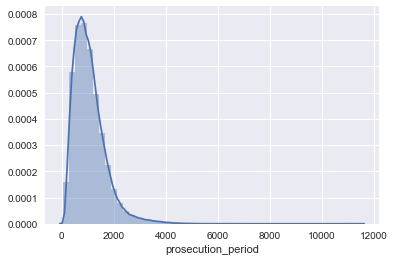

In [13]:
sns.distplot(utility_patents_subset_df.prosecution_period)

plt.show()

## Dealing with Prosecution Period Outliers

Based on the above histogram with KDE plot, we can see that the prosecution period is skewed by a long tail on the right side.  Similar to the narrowing of the data set that we performed for the `number_of_claims` column, we will filter out all of the values that are greater than 3 standard deviations from the median value.

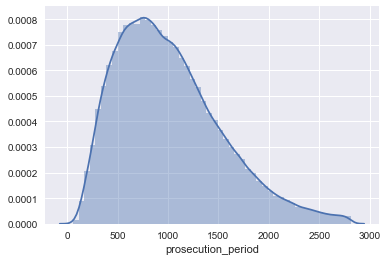

In [14]:
pros_std_dev = utility_patents_subset_df.prosecution_period.std()
pros_median = utility_patents_subset_df.prosecution_period.median()

utility_patents_subset_df = utility_patents_subset_df[utility_patents_subset_df.prosecution_period <= (pros_median + 3*pros_std_dev)]

sns.distplot(utility_patents_subset_df.prosecution_period)

plt.show()

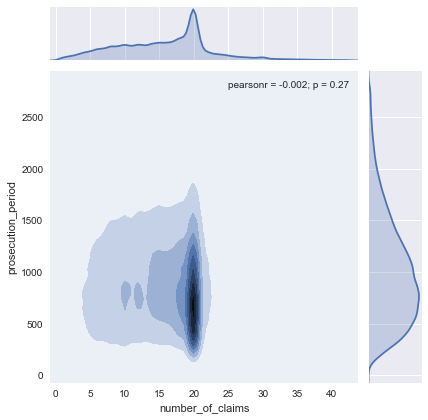

In [15]:
sns.jointplot(x='number_of_claims', y='prosecution_period', data=utility_patents_subset_df, kind="kde")
plt.show()

# Time Series Analysis

In [58]:
filing_ts_df = pd.DataFrame(utility_patents_subset_df.filing_date.value_counts())

filing_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2832 entries, 2013-03-15 to 2009-11-01
Data columns (total 1 columns):
filing_date    2832 non-null int64
dtypes: int64(1)
memory usage: 44.2 KB


In [59]:
filing_ts_df = filing_ts_df.rename(columns={'filing_date':'filings'})

filing_ts_df = filing_ts_df.sort_index()

filing_ts_df['running_total'] = filing_ts_df.filings.cumsum()

filing_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2832 entries, 2009-04-30 to 2017-10-09
Data columns (total 2 columns):
filings          2832 non-null int64
running_total    2832 non-null int64
dtypes: int64(2)
memory usage: 66.4 KB


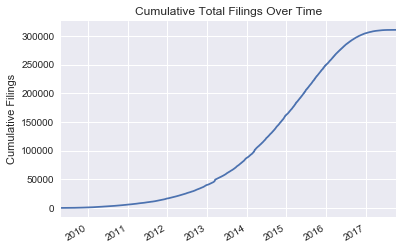

In [51]:
filing_ts_df.running_total.plot()
plt.title("Cumulative Total Filings Over Time")
plt.ylabel("Cumulative Filings")

plt.show()

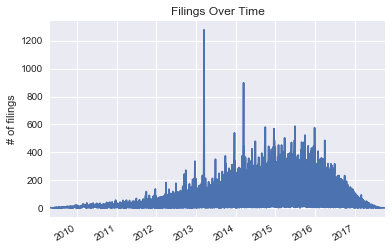

In [49]:
filing_ts_df.filings.plot()
plt.title("Filings Over Time")
plt.ylabel("# of filings")

plt.show()

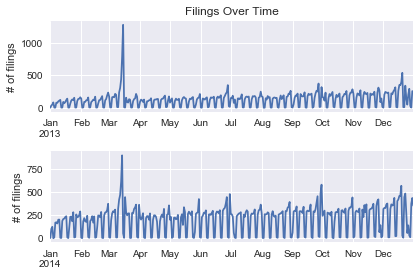

In [57]:
plt.subplot(2,1,1)
filing_ts_df["2013"].filings.plot()
plt.title("Filings Over Time")
plt.ylabel("# of filings")

plt.subplot(2,1,2)
filing_ts_df["2014"].filings.plot()
plt.ylabel("# of filings")

plt.tight_layout()

plt.show()

## Trends

The number of filings over time is distributed normally around the expected filing date given all patents in the sample were granted in 2017 (i.e., median prosecution period is 950 days).

Interestingly, there is a significant spike observed in 2013 and 2014 at the same time (i.e., mid-March).  Furthermore, the subplots for 2013 and 2014, with respect to patents granted in 2017, show a similar distribution of filing activity with a spike in Q1 (i.e., mid-March as noted above) and a general increase in filing activity through the remainder of the year.

There are smaller but significant and noticable bumps in filing activity around late September/early October as well as mid-December in 2013 and 2014.